# GDP and Health Expendiure

Richer countries can afford to invest more on healthcare, on work and road safety, and other measures that reduce mortality. On the other hand, richer countries may have less healthy lifestyles. Is there any relation between the wealth of a country and the life expectancy of its inhabitants?

The following analysis checks whether there is any correlation between the total gross domestic product (GDP) of a country in 2018 and the life expectancy of people born in that country in 2018.

Getting the data
Two datasets of the World Bank are considered. One dataset, available at http://data.worldbank.org/indicator/NY.GDP.MKTP.CD, lists the GDP of the world's countries in current US dollars, for various years. The use of a common currency allows us to compare GDP values across countries. The other dataset, available at http://data.worldbank.org/indicator/SP.DYN.LE00.IN, lists the health expendure of the world's countries.

In [14]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

import pandas as pd

YEAR = 2018
GDP_INDICATOR = 'NY.GDP.PCAP.CD'
gdpReset = pd.read_csv('WB 2018 PC.csv')


LIFE_INDICATOR = 'SH.XPD.CHEX.PP.CD'
lifeReset = pd.read_csv('WB HE 2018.csv')
lifeReset.head()

,Country Name,SH.XPD.CHEX.PP.CD,Year
0,Afghanistan,186.407288,2018
1,Albania,697.304871,2018
2,Algeria,962.719360,2018
3,American Samoa,NaN,2018
4,Andorra,3607.000977,2018


## Cleaning the data

There are countries with empty codes cell, which was dropped

In [2]:
gdpCountries = gdpReset.dropna()
lifeCountries = lifeReset.dropna()

In [4]:
COUNTRY = 'Country Name'
headings = [COUNTRY, GDP_INDICATOR]
gdpClean = gdpCountries[headings]
gdpClean.head()

,Country Name,NY.GDP.PCAP.CD
0,Aruba,493.750418
1,Afghanistan,3289.646664
2,Angola,5284.380184
3,Albania,41793.055260
4,Andorra,6601.825189


The unnecessary columns can be dropped

In [6]:
LIFE = 'Health Expendiure'
lifeCountries[LIFE] = lifeCountries[LIFE_INDICATOR].apply(round)
headings = [COUNTRY, LIFE]
lifeClean = lifeCountries[headings]
lifeClean.head()

<ipython-input-6-196b4aafe5ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lifeCountries[LIFE] = lifeCountries[LIFE_INDICATOR].apply(round)


,Country Name,Health Expendiure
0,Afghanistan,186
1,Albania,697
2,Algeria,963
4,Andorra,3607
5,Angola,165


## Combining the data

The tables are combined through an inner join on the common 'country' column. 

In [7]:
gdpVsLife = pd.merge(gdpClean, lifeClean, on=COUNTRY, how='inner')
gdpVsLife.head()

,Country Name,NY.GDP.PCAP.CD,Health Expendiure
0,Afghanistan,3289.646664,186
1,Angola,5284.380184,165
2,Albania,41793.055260,697
3,Andorra,6601.825189,3607
4,Arab World,43839.356350,1059


## Calculating the correlation
To measure if the life expectancy and the GDP grow together, the Spearman rank correlation coefficient is used. It is a number from -1 (perfect inverse rank correlation: if one indicator increases, the other decreases) to 1 (perfect direct rank correlation: if one indicator increases, so does the other), with 0 meaning there is no rank correlation. A perfect correlation doesn't imply any cause-effect relation between the two indicators. A p-value below 0.05 means the correlation is statistically significant.

In [15]:
from scipy.stats import spearmanr

gdpColumn = gdpVsLife[GDP_INDICATOR]
lifeColumn = gdpVsLife[LIFE]
(correlation, pValue) = spearmanr(gdpColumn, lifeColumn)
print('The correlation is', correlation)
if pValue < 0.05:
    print('It is statistically significant.')
else:
    print('It is not statistically significant.')

The correlation is 0.08069238917304565
It is not statistically significant.


## Showing the data

Measures of correlation can be misleading, so it is best to see the overall picture with a scatterplot. The GDP axis uses a logarithmic scale to better display the vast range of GDP values, from a few million to several billion (million of million) pounds.

<AxesSubplot:xlabel='NY.GDP.PCAP.CD', ylabel='Health Expendiure'>

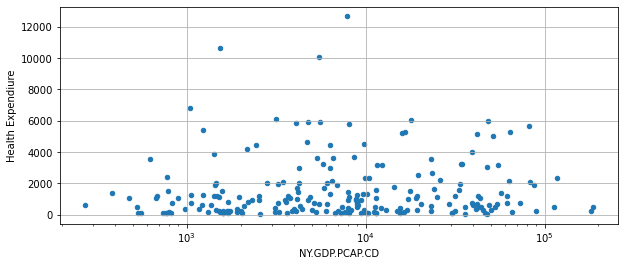

In [11]:
%matplotlib inline
gdpVsLife.plot(x=GDP_INDICATOR, y=LIFE, kind='scatter', grid=True, logx=True, figsize=(10, 4))

The plot shows there is no clear correlation: there are rich countries with low life expectancy, poor countries with high expectancy, and countries with around 10 thousand (104) million pounds GDP have almost the full range of values, from below 50 to over 80 years. Towards the lower and higher end of GDP, the variation diminishes. Above 40 thousand million pounds of GDP (3rd tick mark to the right of 104), most countries have an expectancy of 70 years or more, whilst below that threshold most countries' life expectancy is below 70 years.

Comparing the 10 poorest countries and the 10 countries with the lowest life expectancy shows that total GDP is a rather crude measure. The population size should be taken into account for a more precise definiton of what 'poor' and 'rich' means. Furthermore, looking at the countries below, droughts and internal conflicts may also play a role in life expectancy.

In [12]:
# the 10 countries with lowest GDP
gdpVsLife.sort_values(GDP_INDICATOR).head(10)

,Country Name,NY.GDP.PCAP.CD,Health Expendiure
11,Azerbaijan,271.752044,634
143,Mauritius,381.258988,1381
28,Botswana,475.953610,1089
127,Moldova,527.501326,480
178,Solomon Islands,533.991184,108
35,Cameroon,557.064418,134
174,Saudi Arabia,623.867252,3520
111,Lebanon,677.322179,1086
193,Europe & Central Asia (IDA & IBRD countries),679.972761,1211
72,Guinea,732.717514,109


In [13]:
# the 10 countries with lowest life expectancy
gdpVsLife.sort_values(LIFE).head(10)

,Country Name,NY.GDP.PCAP.CD,Health Expendiure
36,"Congo, Dem. Rep.",2577.701705,31
12,Burundi,47583.074940,66
62,Ethiopia,35733.716000,67
59,Eritrea,30389.360990,74
147,Niger,2027.777979,78
191,Chad,8055.429563,79
128,Madagascar,10276.932820,79
73,"Gambia, The",778.349910,81
14,Benin,813.096849,83
135,Mali,30437.221510,90


Conclusions
To sum up, there is no strong correlation between a country's wealth and the health expendure of its inhabitants: there is often a wide variation of health expendure for countries with similar GDP, countries with the lowest life expectancy are not the poorest countries, and countries with the highest expectancy are not the richest countries. Nevertheless there is some relationship, because the vast majority of countries with a life expectancy below 70 years is on the left half of the scatterplot.